<a href="https://colab.research.google.com/github/bappaditya-paul/Feauture-Enginnering/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [14]:


df = pd.read_csv('/content/sample_data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [15]:
df.shape

(1338, 7)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


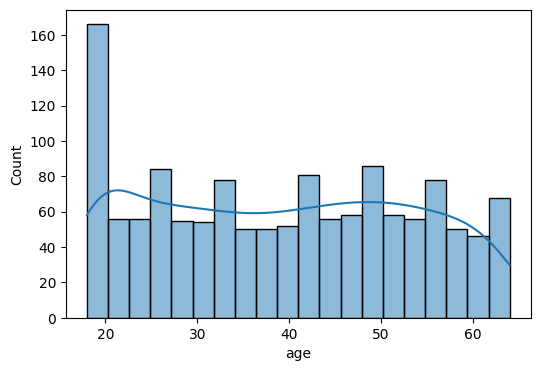

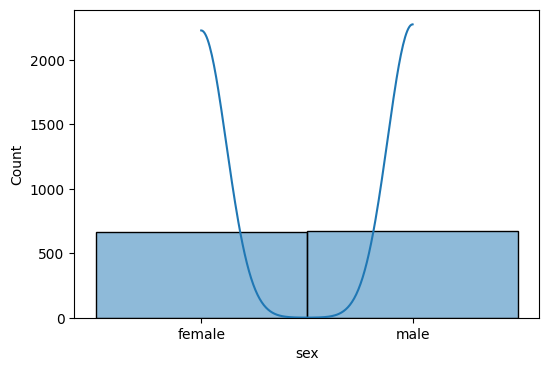

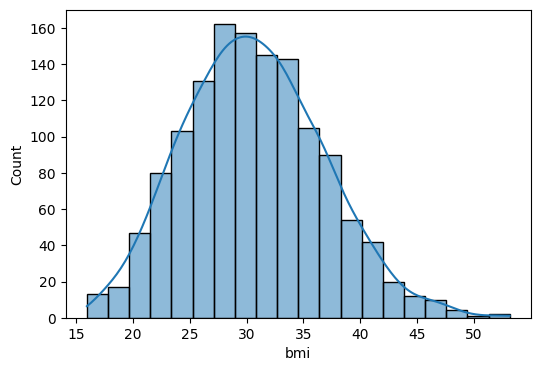

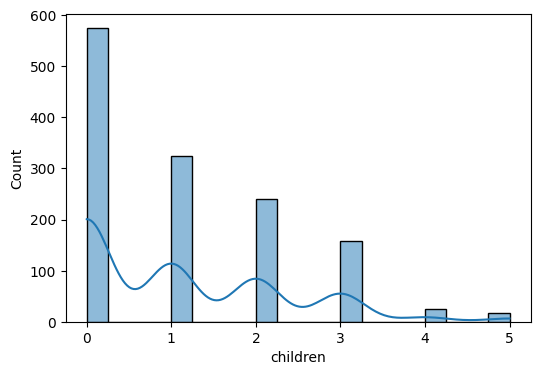

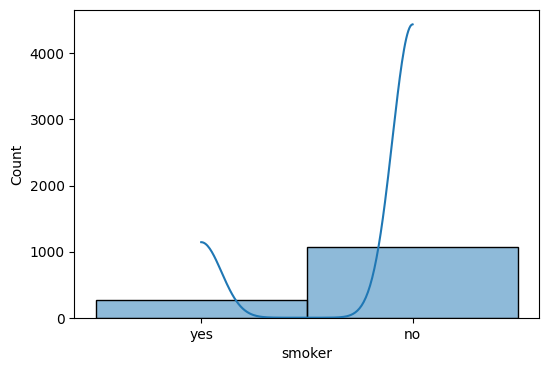

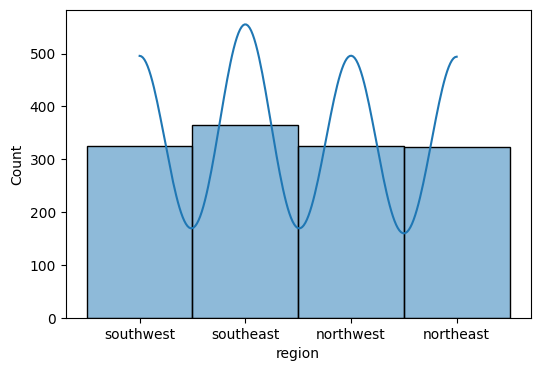

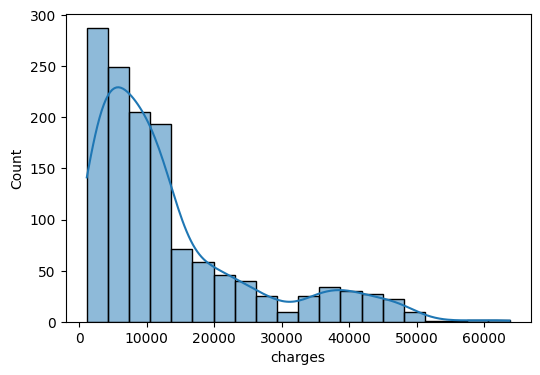

In [20]:
numeric_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[col], kde = True, bins=20)

In [21]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='children', ylabel='count'>

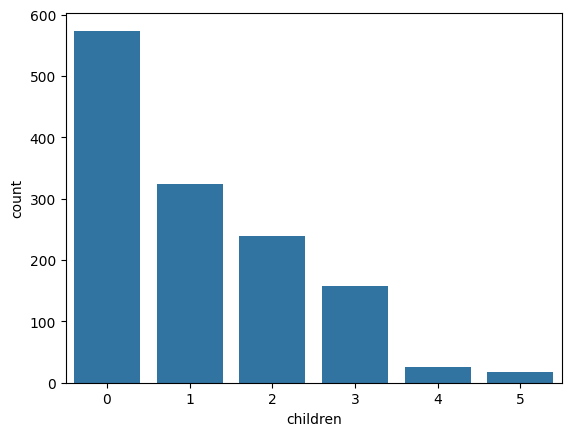

In [22]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

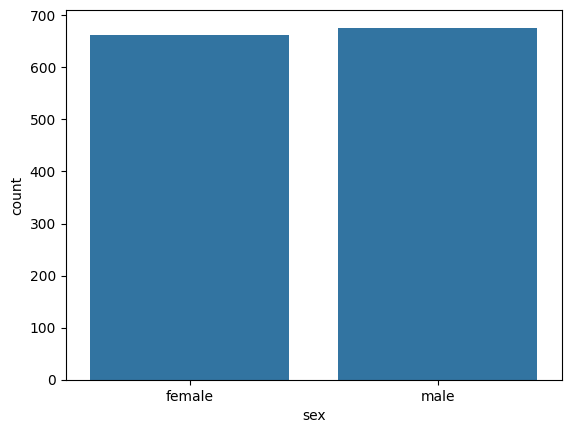

In [23]:
sns.countplot(x =df['sex'])

<Axes: xlabel='count', ylabel='smoker'>

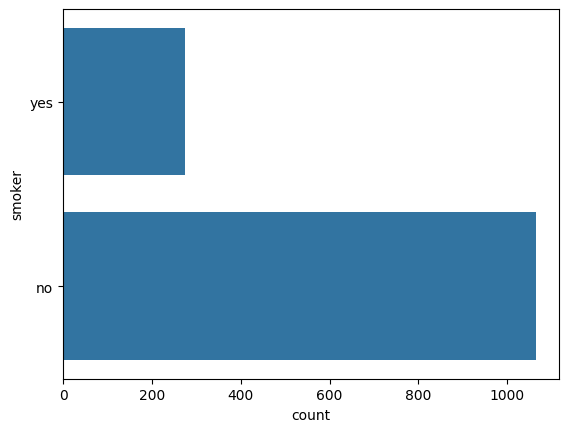

In [24]:
sns.countplot(df['smoker'])

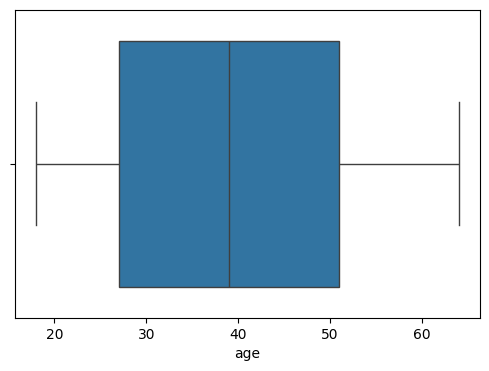

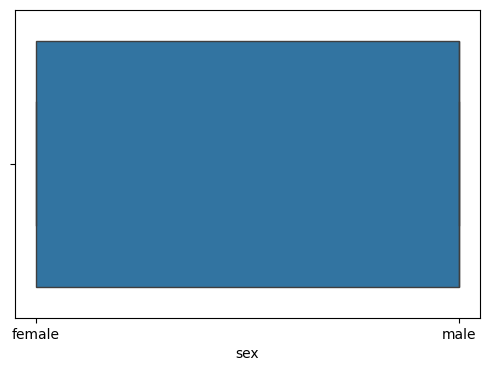

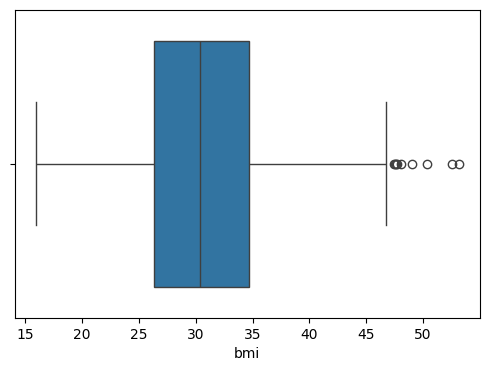

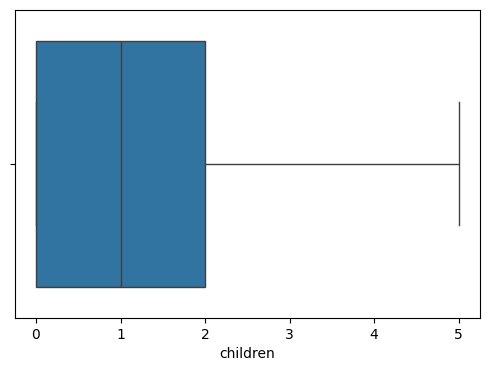

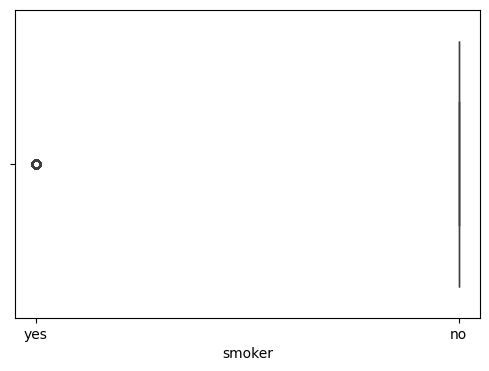

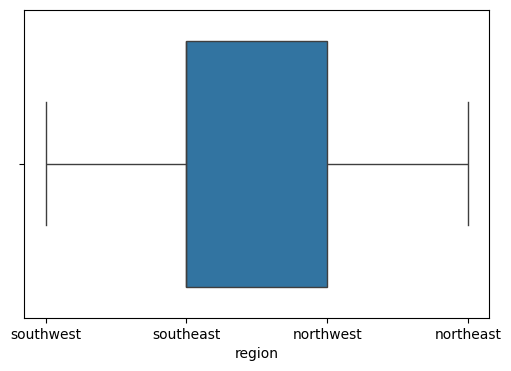

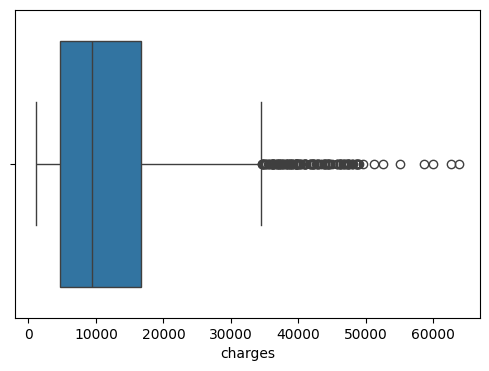

In [25]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])

In [26]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='count', ylabel='smoker'>

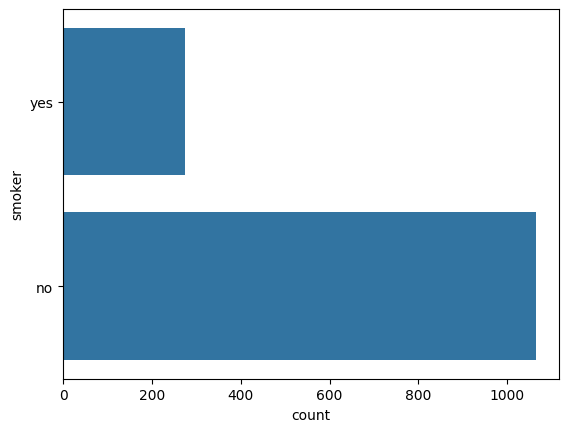

In [27]:
sns.countplot(df['smoker'])

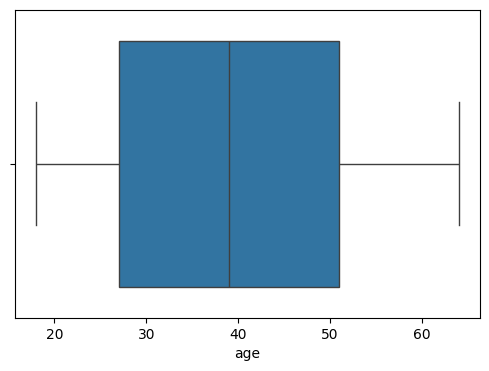

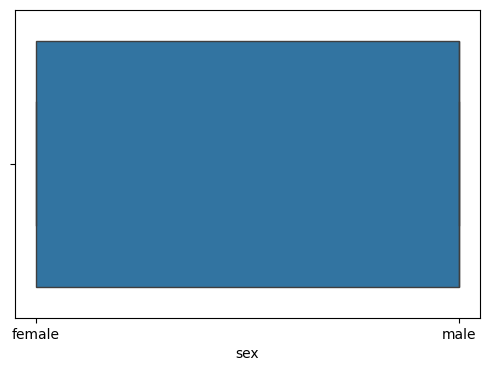

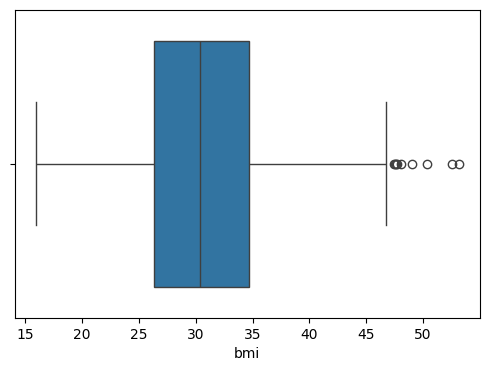

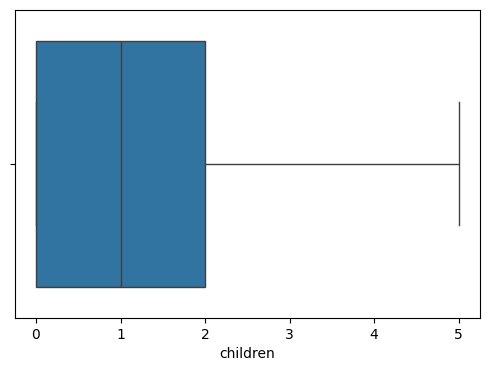

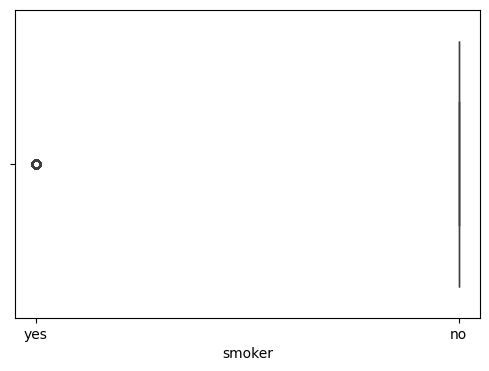

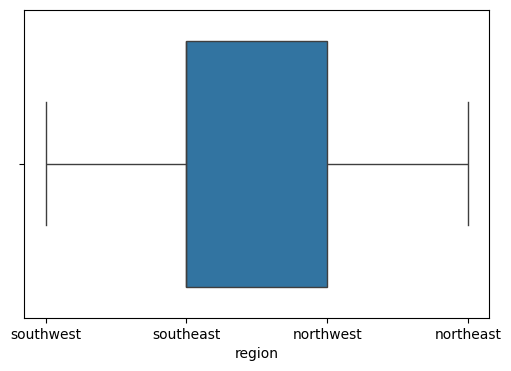

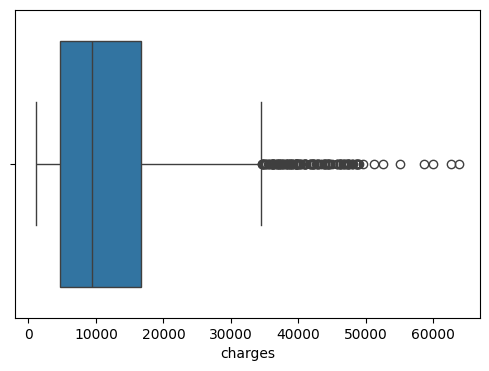

In [28]:
for col in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=df[col])

In [29]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: >

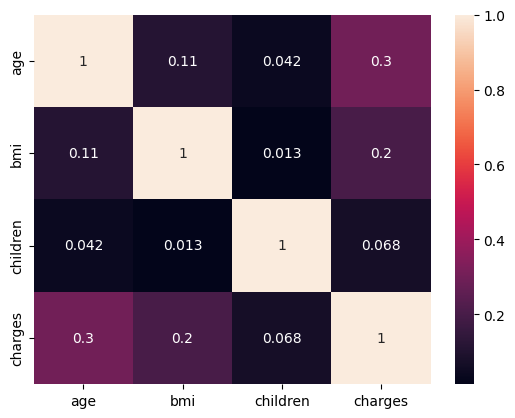

In [31]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
# Data Cleaning and prepossing

In [32]:
df_clean = df.copy()

In [33]:
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [36]:
df_clean.shape

(1337, 7)

In [34]:
df_clean.drop_duplicates(inplace=True)

In [37]:
df_clean.shape

(1337, 7)

In [38]:
df_clean.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [39]:
df_clean.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [40]:
df_clean['sex'].value_counts()

,count
sex,
male,675
female,662


In [42]:
df_clean['sex'] = df_clean['sex'].map({"male":0,"female":1})

In [56]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest
0,19,NaN,27.900,0,1,16884.92400,False,False,False,True,False,False,True
1,18,NaN,33.770,1,0,1725.55230,False,False,True,False,False,True,False
2,28,NaN,33.000,3,0,4449.46200,False,False,True,False,False,True,False
3,33,NaN,22.705,0,0,21984.47061,False,True,False,False,True,False,False
4,32,NaN,28.880,0,0,3866.85520,False,True,False,False,True,False,False


In [44]:
df_clean['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [45]:
df_clean['smoker'] = df_clean['smoker'].map({"no":0,"yes":1})

In [46]:
df_clean['smoker']

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [49]:
df_clean.rename(columns={
    'sex': 'is_female',
    'smoker': 'is_smoker'
}, inplace= True)

In [50]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [53]:
# Check if 'region' column is missing from df_clean
# If missing, it implies an unrecorded change or error in a previous step.
# Re-adding 'region' from the original df to ensure get_dummies can proceed.
if 'region' not in df_clean.columns:
    # This assumes 'df' still holds the original data and is aligned with df_clean's index.
    df_clean['region'] = df['region']

df_clean = pd.get_dummies(df_clean, columns=['region'], drop_first=True)

In [54]:
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest
0,19,NaN,27.900,0,1,16884.92400,False,False,False,True,False,False,True
1,18,NaN,33.770,1,0,1725.55230,False,False,True,False,False,True,False
2,28,NaN,33.000,3,0,4449.46200,False,False,True,False,False,True,False
3,33,NaN,22.705,0,0,21984.47061,False,True,False,False,True,False,False
4,32,NaN,28.880,0,0,3866.85520,False,True,False,False,True,False,False


In [55]:
df_clean.astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

# Feature Engineering

<Axes: xlabel='bmi', ylabel='Count'>

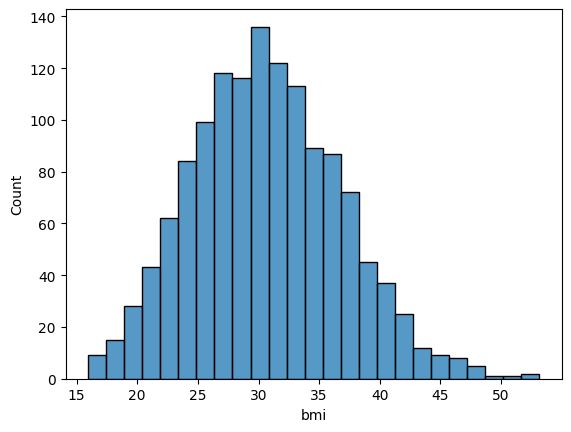

In [57]:
sns.histplot(df['bmi'])

In [59]:
df_clean['bmi_category'] = pd.cut(
    df_clean['bmi'],
    bins= [0,18.5,24.9,29.9,float('inf')],
    labels=['Underweight','Normal','Overweight','Obese']
)

In [60]:
df_clean

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,region_northwest,region_southeast,region_southwest,bmi_category
0,19,NaN,27.900,0,1,16884.92400,False,False,False,True,False,False,True,Overweight
1,18,NaN,33.770,1,0,1725.55230,False,False,True,False,False,True,False,Obese
2,28,NaN,33.000,3,0,4449.46200,False,False,True,False,False,True,False,Obese
3,33,NaN,22.705,0,0,21984.47061,False,True,False,False,True,False,False,Normal
4,32,NaN,28.880,0,0,3866.85520,False,True,False,False,True,False,False,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,NaN,30.970,3,0,10600.54830,False,True,False,False,True,False,False,Obese
1334,18,NaN,31.920,0,0,2205.98080,True,False,False,False,False,False,False,Obese
1335,18,NaN,36.850,0,0,1629.83350,False,False,True,False,False,True,False,Obese
1336,21,NaN,25.800,0,0,2007.94500,False,False,False,True,False,False,True,Overweight


In [61]:
df_clean = df_clean.astype(int)
df_clean.head()

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [62]:
df_clean.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category'],
      dtype='object')

In [64]:
from sklearn.prepocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()
df_clean[cols] = scaler.fit_transform(df_clean[cols])

ModuleNotFoundError: No module named 'sklearn.prepocessing'

In [ ]:
from scipy.stats import pearsonr


